# Overview
Dataset : https://www.kaggle.com/c/digit-recognizer/data?select=train.csv 

Data Description

* The data file train.csv contain gray-scale images of hand-drawn digits, from zero through nine.

* Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.

* Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. 

* This pixel-value is an integer between 0 and 255, inclusive.

* The training data set, (train.csv), has 785 columns. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("MNIST_Data/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [4]:
df.shape

(42000, 785)

In [5]:
# save the labels into a variable label
label = df['label']

# drop the label feature and store the pixel data into data
data = df.drop("label", axis=1)

print(label.shape)
print(data.shape)

(42000,)
(42000, 784)


In [6]:
print(data.columns)

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)


### plot a number


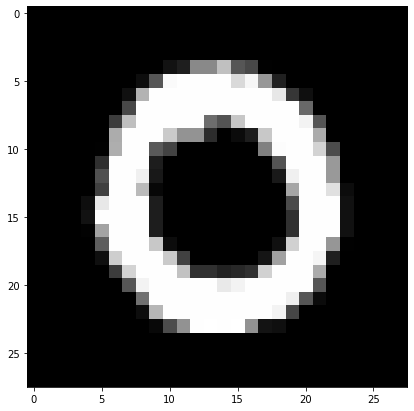

Number = 0


In [7]:
plt.figure(figsize=(7,7))
index = 1
# reshape 1D pixel to 2D pixel array
grid_data = data.iloc[index].to_numpy().reshape(28,28)
plt.imshow(grid_data, cmap='gray')
plt.show()

print("Number =", label[index])

# 2D Visualization using PCA

In [8]:
print(data.shape)
print(label.shape)

(42000, 784)
(42000,)


### Data-preprocessing: Standardizing the data

* Standardize features by removing the mean and scaling to unit variance

* The standard score of a sample x is calculated as:
   
    z = (x - u) / s
    
    where u is the mean of the training samples and s is the standard deviation of the training samples

In [9]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(42000, 784)


In [10]:
sample_data = standardized_data

#### matrix multiplication using numpy


In [11]:
covar_matrix = np.matmul(sample_data.T, sample_data)
print("The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


#### finding top two eigen-values and their corresponding eigen-vectors and project into 2-D space

In [12]:
from scipy.linalg import eigh
# taking top two eigen values 782 and 783
values, vectors = eigh(covar_matrix, eigvals=(782,783))
print("shape of eigen vectors = ", vectors.shape)

# convert the eigen vectors into 2-D space
vectors = vectors.T
print("updated shape of eigen vectors = ", vectors.shape)

shape of eigen vectors =  (784, 2)
updated shape of eigen vectors =  (2, 784)


In [13]:
# project the original data sample on the plane

new_coordinates = np.matmul(vectors, sample_data.T)
print("resultant new data points", new_coordinates.shape)

resultant new data points (2, 42000)


#### append label to the projected data

In [14]:
new_coordinates = np.vstack((new_coordinates, label)).T

In [15]:
new_coordinates.shape

(42000, 3)

#### create a new dataframe for ploting the labeled points

In [16]:
dataframe = pd.DataFrame(data=new_coordinates, columns=("first_data", "second_data", "label"))
print(dataframe.head())

   first_data  second_data  label
0   -5.226445    -5.140478    1.0
1    6.032996    19.292332    0.0
2   -1.705813    -7.644503    1.0
3    5.836139    -0.474207    4.0
4    6.024818    26.559574    0.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


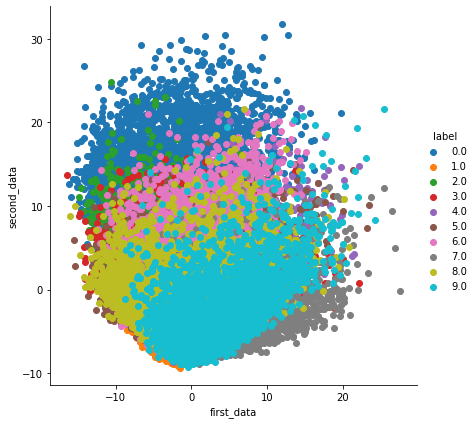

In [17]:
sns.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, "first_data", "second_data").add_legend()
plt.show()

<AxesSubplot:xlabel='first_data', ylabel='second_data'>

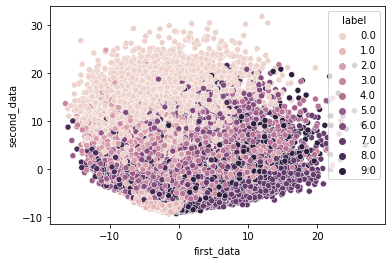

In [18]:
sns.scatterplot(x="first_data", y="second_data", legend="full", hue='label', data=dataframe)

## PCA using Scikit-Learn

In [19]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_data = pca.fit_transform(sample_data)

print("Shape of pca_reduced.shape = ", pca_data.shape)

Shape of pca_reduced.shape =  (42000, 2)


In [20]:
# now appending the label in pca_data
pca_data = np.vstack((pca_data.T, label)).T
pca_data.shape

(42000, 3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


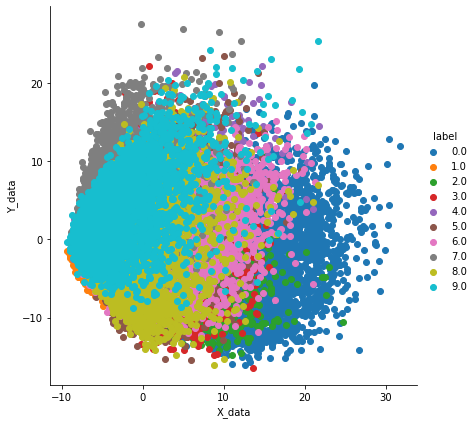

In [21]:
# creating a new dataframe
pca_df = pd.DataFrame(data=pca_data, columns=("X_data", "Y_data", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, "X_data", "Y_data").add_legend()
plt.show()